In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [5]:
carvana = pd.read_csv("final_data.csv")

carvana.head()

Unnamed: 0   VehYear  VehBCost  IsOnlineSale  WarrantyCost  PurchYear  \
0           0 -0.191806 -1.065435     -0.166793      0.194455  -1.031687   
1           1 -0.768751 -1.523737     -0.166793     -1.075463  -1.031687   
2           2 -0.191806 -1.581025     -0.166793     -0.422936  -1.031687   
3           3 -0.768751 -0.664420     -0.166793     -1.135696  -1.031687   
4           4 -0.768751  1.168791     -0.166793     -0.590250  -1.031687   

   AcquisitionAuctionRatio  AcquisitionRetailRatio  CurrentAuctionRatio  \
0                -2.244656               -0.629052            -1.410765   
1                -1.707170               -0.674570            -1.864448   
2                -0.684055                0.650894            -1.184988   
3                -0.367682               -1.387553            -0.136808   
4                -0.352668               -0.375692            -0.242636   

   CurrentRetailRatio  RatioDiffAucAcqCurrAvgPrice  \
0           -0.681319                    -1.325595   
1           -1.236092                     0.109840   
2           -0.080909                     1.209687   
3            0.122449                    -1.110866   
4            0.598443                    -0.700941   

   RatioDiffAucAcqCurrCleanPrice  RatioDiffRetAcqCurrAvgPrice  \
0                      -0.013945                    -0.023969   
1                      -0.012057                     0.574797   
2                      -0.010322                     1.097903   
3                      -0.014119                    -0.980194   
4                      -0.013399                    -0.278519   

   RatioDiffRetAcqCurrCleanPrice  KilometerPerYear  Make_ACURA  Make_BUICK  \
0                      -0.034120         -0.189328         0.0         0.0   
1                       0.372235         -0.690893         0.0         0.0   
2                       0.847932         -0.293814         0.0         0.0   
3                      -0.474704         -0.400272         0.0         0.0   
4                       0.094921         -0.492163         0.0         0.0   

   Make_CADILLAC  Make_CHEVROLET  Make_CHRYSLER  Make_DODGE  Make_FORD  \
0            0.0             0.0            0.0         1.0        0.0   
1            0.0             0.0            0.0         1.0        0.0   
2            0.0             0.0            0.0         0.0        1.0   
3            0.0             0.0            0.0         0.0        0.0   
4            0.0             0.0            0.0         1.0        0.0   

   Make_GMC  Make_HONDA  Make_HUMMER  Make_HYUNDAI  Make_INFINITI  Make_ISUZU  \
0       0.0         0.0          0.0           0.0            0.0         0.0   
1       0.0         0.0          0.0           0.0            0.0         0.0   
2       0.0         0.0          0.0           0.0            0.0         0.0   
3       0.0         0.0          0.0           0.0            0.0         0.0   
4       0.0         0.0          0.0           0.0            0.0         0.0   

   Make_JEEP  Make_KIA  Make_LEXUS  Make_LINCOLN  Make_MAZDA  Make_MERCURY  \
0        0.0       0.0         0.0           0.0         0.0           0.0   
1        0.0       0.0         0.0           0.0         0.0           0.0   
2        0.0       0.0         0.0           0.0         0.0           0.0   
3        0.0       0.0         0.0           0.0         0.0           0.0   
4        0.0       0.0         0.0           0.0         0.0           0.0   

   Make_MINI  Make_MITSUBISHI  Make_NISSAN  Make_OLDSMOBILE  Make_PLYMOUTH  \
0        0.0              0.0          0.0              0.0            0.0   
1        0.0              0.0          0.0              0.0            0.0   
2        0.0              0.0          0.0              0.0            0.0   
3        0.0              1.0          0.0              0.0            0.0   
4        0.0              0.0          0.0              0.0            0.0   

   Make_PONTIAC  Make_SATURN  Make_SCION

In [6]:
carvana.shape

(6798, 88)

In [7]:
X = carvana.drop(["Unnamed: 0", "IsBadBuy"], axis = 1)
y = carvana['IsBadBuy']

# KREIRANJE MODELA

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2022)

#### STABLO ODLUCIVANJA

In [9]:

# Grid -> napravice matricu svih mogucih kombinacija (7*5*4) (iscrno pretrazuje)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': [3,4,5,10,15,20,30], 'min_samples_leaf': [10,15,20,25,30], 'max_depth': [10,15,20,25]}
grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5, scoring='roc_auc')

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': [3, 4, 5, 10, 15, 20, 30],
                         'min_samples_leaf': [10, 15, 20, 25, 30]},
             scoring='roc_auc')

Istampajmo optimalne hiperparametre i optimalan model:

In [10]:
grid.best_params_

{'max_depth': 20, 'max_features': 15, 'min_samples_leaf': 25}

In [11]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=20, max_features=15, min_samples_leaf=25)

Izgradimo optimalan model stabla:

In [12]:
from sklearn.model_selection import cross_val_score
model_tree = grid.best_estimator_
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features=15, min_samples_leaf=25)

Vrednost auc metrike na train delu:

In [13]:
scores = cross_val_score(model_tree, X_train, y_train, cv = 10, scoring = 'roc_auc')
scores.mean()

0.6333146579216418

Izgradimo matricu konfuzije i sracunajmo metrike:

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
y_pred_tree = model_tree.predict_proba(X_test)[:, 1] >= 0.2
y_pred_tree

confusion_matrix(y_test, y_pred_tree)

array([[1319,  451],
       [ 160,  110]], dtype=int64)

Funckija za racunanje evaluacionih metrika:

In [15]:
def print_performance(y, y_pred):
    print(f'Accuracy : {accuracy_score(y, y_pred)}')
    print(f'Precision : {precision_score(y, y_pred)}')
    print(f'Recall : {recall_score(y, y_pred)}')
    print(f'F1 : {f1_score(y, y_pred)}')
    

Metrike za stablo:

In [16]:
print_performance(y_test, y_pred_tree)

Accuracy : 0.7004901960784313
Precision : 0.19607843137254902
Recall : 0.4074074074074074
F1 : 0.26474127557160043


Auc na test delu:

In [17]:
roc_auc_score(y_test, y_pred_tree)

0.5763025737602009

Ispitujemo podoblast oko optimalnih hiperparametara od strane GridSearchCV():

In [18]:

tree_params = {'max_features': [8,9,10,11,12], 'min_samples_leaf': [18,19,20,21,22], 'max_depth': [7,8,9,10,12,13,14]}

grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv = 5, scoring='roc_auc')
grid.fit(X_train, y_train)

grid.best_params_

{'max_depth': 7, 'max_features': 11, 'min_samples_leaf': 19}

Izgradimo model sa tim otpimalnim hiperparametrima:

In [19]:
model_tree = grid.best_estimator_
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, max_features=11, min_samples_leaf=19)

AUC na train delu:

In [20]:
scores = cross_val_score(model_tree, X_train, y_train, cv = 10, scoring = 'roc_auc')
scores.mean()

0.6504105688721513

AUC na test delu:

In [21]:

roc_auc_score(y_test, y_pred_tree)

0.5763025737602009

#### LOGISTICKA REGRESIJA

In [22]:

from sklearn.linear_model import LogisticRegression

logistic_parameters = {'C' : np.linspace(start = 0.0001, stop = 1, num = 20), 'penalty' : ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(solver = "liblinear"), logistic_parameters, cv = 10, scoring = "roc_auc")

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 5.27263158e-02, 1.05352632e-01, 1.57978947e-01,
       2.10605263e-01, 2.63231579e-01, 3.15857895e-01, 3.68484211e-01,
       4.21110526e-01, 4.73736842e-01, 5.26363158e-01, 5.78989474e-01,
       6.31615789e-01, 6.84242105e-01, 7.36868421e-01, 7.89494737e-01,
       8.42121053e-01, 8.94747368e-01, 9.47373684e-01, 1.00000000e+00]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

Najbolja kombinacija hiperparametara C i penalty:

In [23]:
grid.best_params_

{'C': 0.05272631578947369, 'penalty': 'l2'}

Model logisticke regresije izgradjen sa optimalno podesenim hiperparametrima:

In [24]:
grid.best_estimator_

LogisticRegression(C=0.05272631578947369, solver='liblinear')

Vrednosti koje su probane za C i penalty:

In [25]:
grid.cv_results_['params']

[{'C': 0.0001, 'penalty': 'l1'},
 {'C': 0.0001, 'penalty': 'l2'},
 {'C': 0.05272631578947369, 'penalty': 'l1'},
 {'C': 0.05272631578947369, 'penalty': 'l2'},
 {'C': 0.10535263157894738, 'penalty': 'l1'},
 {'C': 0.10535263157894738, 'penalty': 'l2'},
 {'C': 0.15797894736842105, 'penalty': 'l1'},
 {'C': 0.15797894736842105, 'penalty': 'l2'},
 {'C': 0.21060526315789474, 'penalty': 'l1'},
 {'C': 0.21060526315789474, 'penalty': 'l2'},
 {'C': 0.2632315789473684, 'penalty': 'l1'},
 {'C': 0.2632315789473684, 'penalty': 'l2'},
 {'C': 0.3158578947368421, 'penalty': 'l1'},
 {'C': 0.3158578947368421, 'penalty': 'l2'},
 {'C': 0.3684842105263158, 'penalty': 'l1'},
 {'C': 0.3684842105263158, 'penalty': 'l2'},
 {'C': 0.4211105263157895, 'penalty': 'l1'},
 {'C': 0.4211105263157895, 'penalty': 'l2'},
 {'C': 0.4737368421052632, 'penalty': 'l1'},
 {'C': 0.4737368421052632, 'penalty': 'l2'},
 {'C': 0.5263631578947369, 'penalty': 'l1'},
 {'C': 0.5263631578947369, 'penalty': 'l2'},
 {'C': 0.5789894736842105,

Vrednosti metrike auc dobijene za razlicite kombinacije C i penalty:

In [26]:
grid.cv_results_['mean_test_score']


array([0.5       , 0.61735975, 0.67547179, 0.67673349, 0.67666687,
       0.67534   , 0.67631195, 0.67438706, 0.67582963, 0.67373473,
       0.67588686, 0.67307852, 0.67550832, 0.67248593, 0.67516737,
       0.67186122, 0.67454291, 0.67128123, 0.67405641, 0.67086969,
       0.67386325, 0.67056266, 0.67358711, 0.67039613, 0.67321538,
       0.67018636, 0.67285357, 0.6699289 , 0.67268986, 0.66969086,
       0.67250698, 0.66953397, 0.67245725, 0.6693035 , 0.672166  ,
       0.66933118, 0.6717088 , 0.66914962, 0.67152714, 0.66904425])

Kreirajmo model logisticke regresije sa optimalno podesenim hiperparametrima C i penalty:

In [27]:
lr = grid.best_estimator_
lr.fit(X_train, y_train)

LogisticRegression(C=0.05272631578947369, solver='liblinear')

Vrednost za auc na train delu:

In [28]:
cross_val_score(lr, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6767334869066938

In [29]:
!pip install yellowbrick
from yellowbrick.model_selection import LearningCurve

In [37]:
model = LogisticRegression(C=0.05272631578947369, penalty = 'l2', solver='liblinear')
visualizer = LearningCurve(
    model, cv=10, scoring='roc_auc', train_sizes=np.linspace(0.2,1.0,10), n_jobs=4)

visualizer.fit(X,y)        
visualizer.show()

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

Pomocu RandomizedSearchCV cemo malo bolje pretraziti okolinu optimalne vrednosti za C. Uniformno cemo uzimati neku od vrednosti za C u intervalu (0.3, 1), a za penalty cemo slucajno uzimati jednu od vrednosti (l1, l2). Biracemo 100 tacaka i kros-validacijom utvrditi koja je to nasa otpimalna kombinacija hiperparametara.

In [31]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

logistic_params = {'C' : scipy.stats.uniform(0.3, 1),
                  'penalty' : ['l1', 'l2']}

number_iterations = 100

random_s = RandomizedSearchCV(LogisticRegression(solver="liblinear"), param_distributions = logistic_params, 
                              n_iter = number_iterations, cv = 10, scoring = "roc_auc")

random_s.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001724E1099A0>,
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

Najbolja kombinacija hiperparametara C i penalty:

In [32]:
random_s.best_params_

{'C': 0.30686221499034977, 'penalty': 'l1'}

Model sa najboljim vrednostima hiperparametara C i penalty:

In [33]:
random_s.best_estimator_

LogisticRegression(C=0.30686221499034977, penalty='l1', solver='liblinear')

Vrednosti hiperparametara koje su isprobane:

In [34]:
random_s.cv_results_['params']

[{'C': 1.2837152166780579, 'penalty': 'l2'},
 {'C': 0.30686221499034977, 'penalty': 'l1'},
 {'C': 0.7494527523669807, 'penalty': 'l2'},
 {'C': 0.9884317465068708, 'penalty': 'l2'},
 {'C': 0.7773654716504619, 'penalty': 'l2'},
 {'C': 1.0519922254925755, 'penalty': 'l1'},
 {'C': 0.6400159557319007, 'penalty': 'l2'},
 {'C': 0.7372300894657795, 'penalty': 'l1'},
 {'C': 0.6690428507073398, 'penalty': 'l2'},
 {'C': 1.2058037463436455, 'penalty': 'l2'},
 {'C': 0.4984341182163345, 'penalty': 'l1'},
 {'C': 0.37631483599673704, 'penalty': 'l2'},
 {'C': 0.7614406004255394, 'penalty': 'l1'},
 {'C': 1.1709086060281009, 'penalty': 'l1'},
 {'C': 0.7916886851283012, 'penalty': 'l1'},
 {'C': 1.0977264135725306, 'penalty': 'l1'},
 {'C': 0.7189350300189075, 'penalty': 'l1'},
 {'C': 0.616470288223365, 'penalty': 'l1'},
 {'C': 0.49543861668835537, 'penalty': 'l2'},
 {'C': 1.1917450956968507, 'penalty': 'l1'},
 {'C': 0.8596471504525958, 'penalty': 'l2'},
 {'C': 1.1198816399557572, 'penalty': 'l2'},
 {'C': 0

Kreirajmo model logisticke regresije sa otpimalno podesenim hiperparametrima:

In [35]:
lr = random_s.best_estimator_
lr.fit(X_train,y_train)

LogisticRegression(C=0.30686221499034977, penalty='l1', solver='liblinear')

Vrednost auc na train delu (ocenjen kroz kros validaciju):

In [36]:
cross_val_score(lr, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6756043221159709

Kreiranje predikcija i matrice konfuzije na test delu:

In [37]:
y_pred_lr = lr.predict_proba(X_test)[:, 1] >= 0.1
y_pred_lr

confusion_matrix(y_test, y_pred_lr)

array([[843, 927],
       [ 60, 210]], dtype=int64)

Vrednost auc na test delu:

In [38]:
roc_auc_score(y_test, y_pred_lr)

0.6270244821092279

Racunanje standardnih evaluacionih metrika na test delu:

In [39]:
print_performance(y_test, y_pred_lr)

Accuracy : 0.5161764705882353
Precision : 0.18469656992084432
Recall : 0.7777777777777778
F1 : 0.29850746268656714


Koeficijenti uz promenljive kod optimalnog modela:

In [40]:
lr.coef_

array([[-0.22960227, -0.35079206, -0.00105056,  0.08186297,  0.09940518,
         0.09324353,  0.03406181,  0.        , -0.05139389, -0.30635609,
        -0.01296341,  0.26037834,  0.07561531,  0.        ,  0.        ,
         0.        ,  0.        , -0.05758599,  0.        , -0.09143885,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.16655646,
         0.05746306,  0.        ,  0.        ,  0.        ,  0.24002769,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.18864345,  0.08937728,  0.        ,
         0.04573589, -0.03495118,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.02931943, -0.00865778,
        -0.11279242,  0.        ,  0.        , -0.29584714,  0.        ,
        -0.68297783, -0.0942398 ,  0.        ,  0. 

Prikazimo graficki znacajnost svakog atributa:

<AxesSubplot:ylabel='att'>

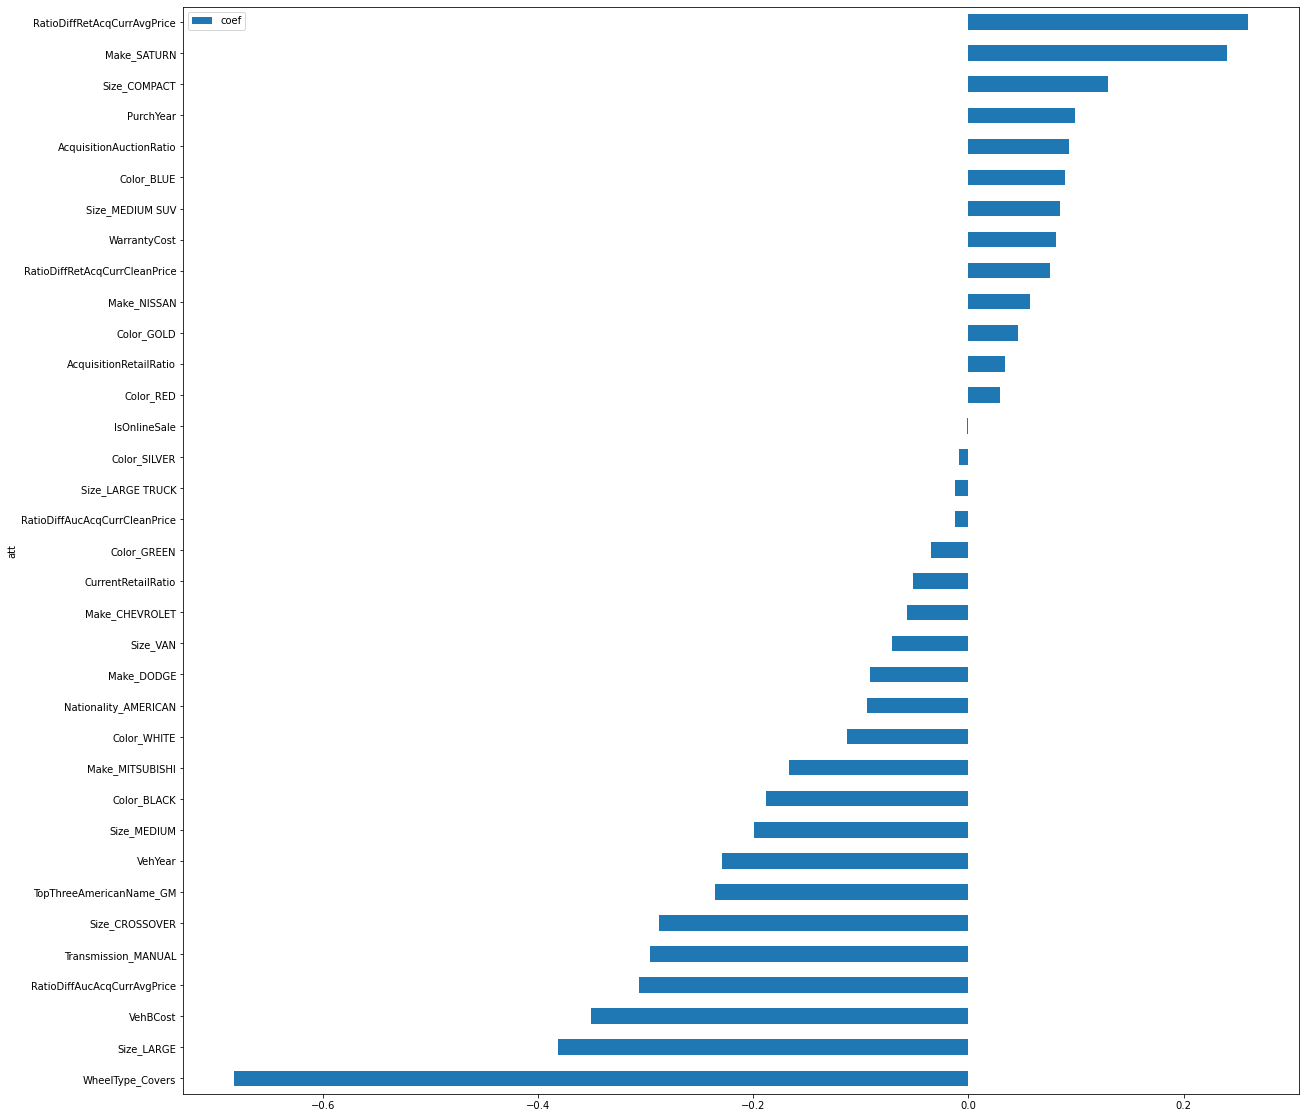

In [41]:
coef = pd.DataFrame({'att': X.columns, 'coef': lr.coef_[0]}).sort_values(by='coef', ascending=True)
coef = coef.loc[coef['coef'] != 0, :]
coef.plot.barh(x='att', y='coef', figsize=(20, 20))

#### KNN

Ispitajmo koje su to optimalne vrednosti hiperparametrima kod knn algoritma n_neighbors, weights i metric u odnosu na evaluacionu metriku auc u ovom slucaju:

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors' : [3,5,7,9,11,13,15], 'weights' : ['uniform', 'distance'],  'metric' : ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5, scoring="roc_auc")
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

Pogledajmo koje su to optimalne vrednosti hiperparametara:

In [43]:
grid_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

Kreirajmo knn model sa optimalno podesenim vrednostima hiperparametara:

In [44]:
knn_model = grid_knn.best_estimator_
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

In [45]:
cross_val_score(knn_model, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6521819027014373

Kreirajmo predikcije i matricu konfuzije na test setu:

In [46]:
y_pred_knn = knn_model.predict_proba(X_test)[:, 1] >= 0.1
confusion_matrix(y_test, y_pred_knn)

array([[852, 918],
       [ 79, 191]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [47]:
print_performance(y_test, y_pred_knn)

Accuracy : 0.5112745098039215
Precision : 0.17222723174030657
Recall : 0.7074074074074074
F1 : 0.27701232777374907


Auc na test delu:

In [48]:
roc_auc_score(y_test, y_pred_knn)

0.5943816698053985

#### VOTING

Kreirajmo VotingClassifier() i ubacimo otpimalno podesenu logisticku regresiju, knn i stablo odlucivanja kao algoritme koji glasaju. Stavicemo da je nacin glasanja "soft", odnosno da ce se porediti verovatnoce za svaku opservaciju:

In [49]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(voting = "soft", estimators=[('lr', lr), ('tree', model_tree), ('knn', knn_model)])

model_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.30686221499034977,
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('tree',
                              DecisionTreeClassifier(max_depth=7,
                                                     max_features=12,
                                                     min_samples_leaf=20)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=15,
                                                   weights='distance'))],
                 voting='soft')

Sracunajmo vrednost za auc na train delu (pomocu kros-validacije):

In [50]:
cross_val_score(model_voting, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.6867960623352687

Kreirajmo predikcije i matricu konfuzije na test delu:

In [51]:
y_pred_voting = model_voting.predict_proba(X_test)[:,1] > 0.1
confusion_matrix(y_test, y_pred_voting)

array([[826, 944],
       [ 69, 201]], dtype=int64)

Prikazimo standardne evaluacione metrike sracunate iz matrice konfuzije:

In [52]:
print_performance(y_test, y_pred_voting)

Accuracy : 0.5034313725490196
Precision : 0.17554585152838428
Recall : 0.7444444444444445
F1 : 0.2840989399293286


Sracunajmo auc na test delu:

In [53]:
roc_auc_score(y_test, y_pred_voting)

0.6055555555555555

#### STACKING

Kreirajmo StackingClassifier() sa optimalno podesenim algoritimima logisticke regresije i stabla odlucivanja:

In [54]:
from mlxtend.classifier import StackingClassifier
model_stacking = StackingClassifier(classifiers = [lr, model_tree],
                                   meta_classifier = lr,
                                   use_features_in_secondary=True)
model_stacking.fit(X_train, y_train)


StackingClassifier(classifiers=[LogisticRegression(C=0.30686221499034977,
                                                   penalty='l1',
                                                   solver='liblinear'),
                                DecisionTreeClassifier(max_depth=7,
                                                       max_features=12,
                                                       min_samples_leaf=20)],
                   meta_classifier=LogisticRegression(C=0.30686221499034977,
                                                      penalty='l1',
                                                      solver='liblinear'),
                   use_features_in_secondary=True)

Sracunajmo auc na train delu (kroz kros validaciju):

In [55]:
cross_val_score(model_stacking, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.6780281421863813

Kreraijmo predikcije i matricu konfuzije na test delu:

In [56]:
y_pred_stacking = model_stacking.predict_proba(X_test)[:,1] > 0.1
confusion_matrix(y_test, y_pred_stacking)

array([[848, 922],
       [ 59, 211]], dtype=int64)

Sracunajmo osnovne evaluacione metrike iz matrice konfuzije:

In [57]:
print_performance(y_test, y_pred_stacking)

Accuracy : 0.5191176470588236
Precision : 0.18623124448367168
Recall : 0.7814814814814814
F1 : 0.300784034212402


Sracunajmo auc na test delu:

In [58]:
roc_auc_score(y_test, y_pred_stacking)

0.6302887633396108

#### BAGGING

Kreirajmo BaggingClassifier(), gde cemo kao base_estimator staviti optimalno podeseni model logisticke regresije:

In [59]:
from sklearn.ensemble import BaggingClassifier
model_bagging = BaggingClassifier(base_estimator = lr, bootstrap=100)
model_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.30686221499034977,
                                                    penalty='l1',
                                                    solver='liblinear'),
                  bootstrap=100)

Auc na train delu:

In [60]:
cross_val_score(model_bagging, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.6748309833228593

Kreirajmo predikcije i matricu konfuzije na test delu:

In [61]:
y_pred_bagging = model_bagging.predict_proba(X_test)[:, 1] > 0.1
confusion_matrix(y_test, y_pred_bagging)

array([[835, 935],
       [ 58, 212]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [62]:
print_performance(y_test, y_pred_bagging)

Accuracy : 0.513235294117647
Precision : 0.18482999128160418
Recall : 0.7851851851851852
F1 : 0.2992237120677487


Auc na test delu:

In [63]:
roc_auc_score(y_test, y_pred_bagging)

0.6284682988072818

#### RANDOM FOREST

Kreirajmo RandomForestClassifier sa 200 stabala:

In [64]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 200, oob_score = True)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True)

Sracunajmo auc na train delu (kroz kros-validaciju):

In [65]:
cross_val_score(forest, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.702059479535016

Pogledajmo koliko forest(suma) svaki od atributa smatra znacajnim:

In [66]:
forest.feature_importances_

array([3.21574306e-02, 7.61962260e-02, 2.85327072e-03, 5.73320796e-02,
       1.21090241e-02, 6.55353409e-02, 6.57592220e-02, 6.35609417e-02,
       6.30623457e-02, 6.00741086e-02, 6.08656347e-02, 6.30833144e-02,
       6.01543635e-02, 6.71381863e-02, 7.57775461e-04, 1.90973682e-03,
       7.15154563e-06, 7.30825493e-03, 5.44141213e-03, 5.83986586e-03,
       6.33231890e-03, 8.48171396e-04, 1.21788191e-03, 0.00000000e+00,
       2.92903154e-03, 1.36554248e-03, 2.39480738e-05, 3.13312427e-03,
       3.84244616e-03, 7.09748468e-04, 3.95771087e-05, 2.08836615e-03,
       2.10121774e-03, 7.97844838e-04, 1.06244936e-03, 2.73404785e-03,
       7.86117730e-04, 2.46259574e-07, 3.89718700e-03, 4.14736438e-03,
       2.93130186e-06, 0.00000000e+00, 1.42697554e-03, 1.17347529e-03,
       3.14922366e-04, 1.33119156e-05, 4.26524052e-03, 6.56384847e-03,
       9.07710647e-03, 2.22539641e-03, 6.58929129e-03, 4.36656715e-03,
       7.97184225e-03, 3.53860584e-03, 2.58548231e-04, 1.12725607e-04,
      

Kreirajmo predikcije i matricu konfuzije na test delu:

In [67]:
y_pred_forest = forest.predict_proba(X_test)[:, 1] > 0.1
confusion_matrix(y_test, y_pred_forest)

array([[888, 882],
       [ 68, 202]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [68]:
print_performance(y_test, y_pred_forest)

Accuracy : 0.5343137254901961
Precision : 0.1863468634686347
Recall : 0.7481481481481481
F1 : 0.2983751846381093


Auc na test delu:

In [69]:
roc_auc_score(y_test, y_pred_bagging)

0.6284682988072818

Da nam je zeljena metrika accuracy, mogli bi direktno iz objekta forest da izvucemo koliko iznosi vrednost metrike na "test delu", odnosno na onom delu dataseta koji nije uzet prilikom kreiranja algoritma:

In [70]:
forest.oob_score_

0.8741067675493905

# SELEKCIJA ATRIBUTA

In [71]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

Pokusacemo da na osnovu zavisnosti varijable sa izlaznom utvrdimo kojih 20 varijabli su najbolje za kreiranje modela:

In [72]:
# K BEST
selection = SelectKBest(k=20, score_func = f_classif)
selection.fit(X, y)
selection.get_support()

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False])

Uzmimo podset samo 20 najboljih varijabli kao ulaz u algoritam:

In [73]:
X_reduced_kbest = X.loc[:, selection.get_support()]

 Deljenje u train i test novih podataka:

In [74]:
X_reduced_kbest_train, X_reduced_kbest_test, y_train, y_test = train_test_split(X_reduced_kbest, y, test_size=0.3, random_state=2019)

### Pravljenje otpimalnih algoritama sa best_k

#### STABLO ODLUCIVANJA

Kreirajmo model stabla odlucivanja sa optimalnom podesenim hiperparametrima, ali cemo na ulazu koristiti samo 50 najboljih atributa:

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': [3,4,5,6,7,8,9,10], 'min_samples_leaf': [10,20,30,40,50], 'max_depth': [2,3,4,5,7,8,9,10]}
grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5, scoring='roc_auc')
grid.fit(X_reduced_kbest_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 7, 8, 9, 10],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

Pogledajmo koje su to optimalne vrednosti hiperparametara:

In [98]:
grid.best_params_

{'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 40}

Pogledajmo kako izgleda model stabla sa optimalno podesenim hiperparametrima:

In [99]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=7, min_samples_leaf=40)

Kreirajmo optimalno stablo:

In [100]:
model_tree_bestk = grid.best_estimator_
model_tree_bestk.fit(X_reduced_kbest_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=7, min_samples_leaf=40)

Ispitajmo vrednosti auc na train delu:

In [101]:
cross_val_score(model_tree_bestk, X_reduced_kbest_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6419945247354918

Kreirajmo predikcije i matricu konfuzije na test delu:

In [102]:
y_pred_tree_bestk = model_tree_bestk.predict_proba(X_reduced_kbest_test)[:, 1] >= 0.2
confusion_matrix(y_test, y_pred_tree_bestk)

array([[1420,  345],
       [ 175,  100]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [103]:
print_performance(y_test, y_pred_tree_bestk)

Accuracy : 0.7450980392156863
Precision : 0.2247191011235955
Recall : 0.36363636363636365
F1 : 0.2777777777777778


Ispitajmo vrednosti za auc na test delu:

In [104]:
roc_auc_score(y_test, y_pred_tree_bestk)

0.5840844707700231

#### LOGISTICKA REGRESIJA

Kreirajmo model logisticke regresije sa optimalnom podesenim hiperparametrima, ali cemo na ulazu koristiti samo 20 najboljih atributa. Kako znamo da je optimalno C u vise navrata iznosilo 0.5, nema potrebe za gridom i prolaskom kroz vise redova velicina, vec je sasvim u redu da se ogranicimo na interval od (0.3, 1):

In [105]:
logistic_params = {'C' : scipy.stats.uniform(0.3, 1),
                  'penalty' : ['l1', 'l2']}

number_iterations = 100

random_s = RandomizedSearchCV(LogisticRegression(solver="liblinear"), param_distributions = logistic_params, 
                              n_iter = number_iterations, cv = 10, scoring = "roc_auc")

random_s.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001724EE87520>,
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

Izgradimo optimalan model:

In [106]:
lr_bestk = random_s.best_estimator_
lr_bestk.fit(X_reduced_kbest_train, y_train)

LogisticRegression(C=0.30921863829080337, solver='liblinear')

Rezultati auc na train delu:

In [107]:
cross_val_score(lr_bestk, X_reduced_kbest_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6691989031004661

Kreirajmo predikcije i matricu konfuzije:

In [108]:
y_pred_lr_bestk = lr_bestk.predict_proba(X_reduced_kbest_test)[:, 1] >= 0.1
confusion_matrix(y_test, y_pred_lr_bestk)

array([[816, 949],
       [ 64, 211]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [109]:
print_performance(y_test, y_pred_lr_bestk)

Accuracy : 0.5034313725490196
Precision : 0.18189655172413793
Recall : 0.7672727272727272
F1 : 0.2940766550522648


Rezultati auc na test delu:

In [110]:
roc_auc_score(y_test, y_pred_lr_bestk)

0.6147978367241823

Kreiranje grafikona najbitnijih atributa:

<AxesSubplot:ylabel='att'>

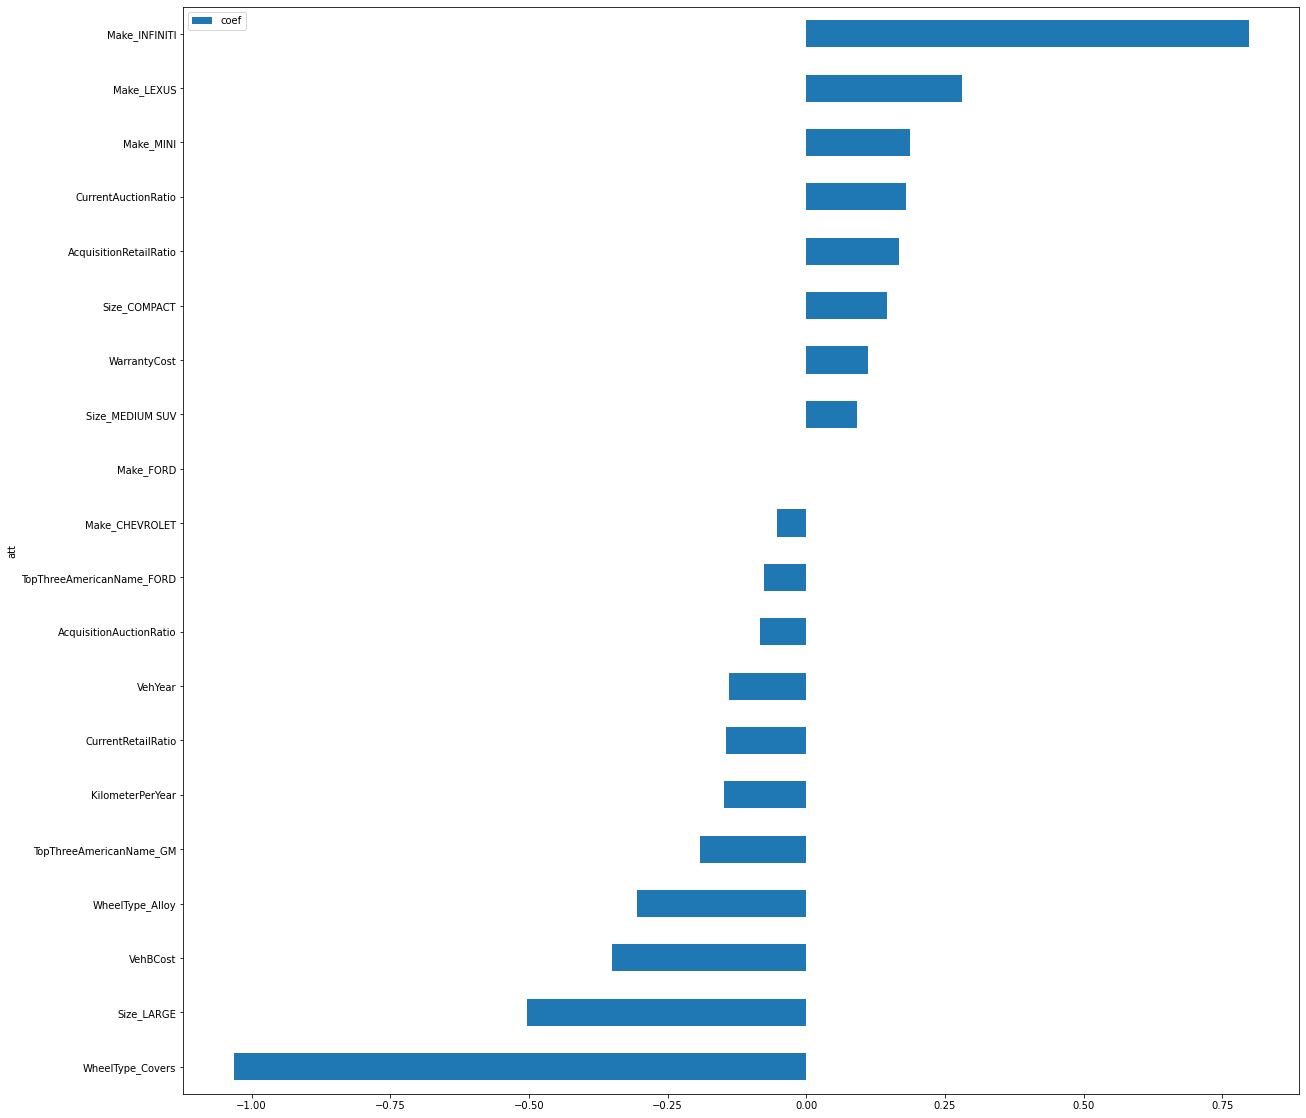

In [111]:
coef = pd.DataFrame({'att': X_reduced_kbest_train.columns, 'coef': lr_bestk.coef_[0]}).sort_values(by='coef', ascending=True)
coef = coef.loc[coef['coef'] != 0, :]
coef.plot.barh(x='att', y='coef', figsize=(20, 20))

#### KNN

Ispitajmo koje su to vrednosti za hiperparametre na podskupu bitnih ulaznih atributa za maksimizaciju auc-a:

In [112]:
knn_params = {'n_neighbors' : [3,5,7,9,11,13,15], 'weights' : ['uniform', 'distance'],  'metric' : ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5, scoring="roc_auc")
grid_knn.fit(X_reduced_kbest_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

Pogledajmo koje su to optimalne vrednosti hiperparametara:

In [113]:
grid_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}

Kreirajmo model sa optimalno podesenim hiperparametrima:

In [114]:
knn_model_bestk = grid_knn.best_estimator_
knn_model_bestk.fit(X_reduced_kbest_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

Auc na train delu:

In [115]:
cross_val_score(knn_model_bestk, X_reduced_kbest_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.628956705316972

Kreirajmo predikcije i matricu konfuzije na test delu:

In [116]:
y_pred_knn_bestk = knn_model_bestk.predict_proba(X_reduced_kbest_test)[:, 1] >= 0.1
confusion_matrix(y_test, y_pred_knn_bestk)

array([[954, 811],
       [109, 166]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [117]:
print_performance(y_test, y_pred_knn_bestk)

Accuracy : 0.5490196078431373
Precision : 0.1699078812691914
Recall : 0.6036363636363636
F1 : 0.26517571884984026


Auc na test delu:

In [118]:
roc_auc_score(y_test, y_pred_knn_bestk)

0.572073139325264

#### VOTING

Kreirajmo VotingClassifier sa optimalno podesenim modelima na podskupu bitnih atributa:

In [119]:
model_voting_bestk = VotingClassifier(voting = "soft", estimators=[('lr', lr_bestk), ('tree', model_tree_bestk),
                                                                  ('knn', knn_model_bestk)])

model_voting_bestk.fit(X_reduced_kbest_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.30921863829080337,
                                                 solver='liblinear')),
                             ('tree',
                              DecisionTreeClassifier(max_depth=4,
                                                     max_features=7,
                                                     min_samples_leaf=40)),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=15))],
                 voting='soft')

Auc na train delu:

In [120]:
cross_val_score(model_voting_bestk, X_reduced_kbest_train, y_train, cv=10, scoring='roc_auc').mean()

0.6709823423855439

Kreirajmo predikcije i matricu konfuzije:

In [121]:
y_pred_voting_bestk = model_voting_bestk.predict_proba(X_reduced_kbest_test)[:,1] > 0.1
confusion_matrix(y_test, y_pred_voting_bestk)

array([[815, 950],
       [ 63, 212]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [122]:
print_performance(y_test, y_pred_voting_bestk)

Accuracy : 0.5034313725490196
Precision : 0.18244406196213425
Recall : 0.7709090909090909
F1 : 0.2950591510090466


Auc na test delu:

In [123]:
roc_auc_score(y_test, y_pred_voting_bestk)

0.616332732423384

#### STACKING

Kreirajmo StackingClassifier sa optimalno podesenim modelima na podskupu bitnih atributa:

In [124]:
model_stacking_bestk = StackingClassifier(classifiers = [lr_bestk, model_tree_bestk],
                                   meta_classifier = lr_bestk,
                                   use_features_in_secondary=True)
model_stacking_bestk.fit(X_reduced_kbest_train, y_train)


StackingClassifier(classifiers=[LogisticRegression(C=0.30921863829080337,
                                                   solver='liblinear'),
                                DecisionTreeClassifier(max_depth=4,
                                                       max_features=7,
                                                       min_samples_leaf=40)],
                   meta_classifier=LogisticRegression(C=0.30921863829080337,
                                                      solver='liblinear'),
                   use_features_in_secondary=True)

Auc na train delu:

In [125]:
cross_val_score(model_stacking_bestk, X_reduced_kbest_train, y_train, cv=10, scoring='roc_auc').mean()

0.6691907642399769

Kreirajmo predikcije i matricu konfuzije na test delu:

In [126]:
y_pred_stacking_bestk = model_stacking_bestk.predict_proba(X_reduced_kbest_test)[:,1] > 0.1
confusion_matrix(y_test, y_pred_stacking_bestk)

array([[816, 949],
       [ 64, 211]], dtype=int64)

Sracunajmo i prikazimo standardne evaluacione metrike:

In [127]:
print_performance(y_test, y_pred_stacking_bestk)

Accuracy : 0.5034313725490196
Precision : 0.18189655172413793
Recall : 0.7672727272727272
F1 : 0.2940766550522648


Auc na test delu:

In [128]:
roc_auc_score(y_test, y_pred_stacking_bestk)

0.6147978367241823

#### BAGGING

Kreirajmo BaggingClassifier(), gde cemo kao base_estimator staviti optimalno podeseni model logisticke regresije na podskupu ulaznih podataka:

In [132]:
model_bagging_bestk = BaggingClassifier(base_estimator = model_tree_bestk, bootstrap=200)
model_bagging_bestk.fit(X_reduced_kbest_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        max_features=7,
                                                        min_samples_leaf=40),
                  bootstrap=200)

Auc na train delu:

In [133]:
cross_val_score(model_bagging_bestk, X_reduced_kbest_train, y_train, cv=10, scoring='roc_auc').mean()

0.6604903868626091

Kreirajmo predikcije i matricu konfuzije na test delu:

In [134]:
y_pred_bagging_bestk = model_bagging_bestk.predict_proba(X_reduced_kbest_test)[:, 1] > 0.1
confusion_matrix(y_test, y_pred_bagging_bestk)

array([[ 765, 1000],
       [  49,  226]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [135]:
print_performance(y_test, y_pred_bagging_bestk)

Accuracy : 0.4857843137254902
Precision : 0.18433931484502447
Recall : 0.8218181818181818
F1 : 0.30113257828114587


Auc na test delu:

In [136]:
roc_auc_score(y_test, y_pred_bagging_bestk)

0.6276229719289209

#### RANDOM FOREST

Kreirajmo Random forest na podskupu 40 bitnih atributa:

In [137]:
forest_bestk = RandomForestClassifier(n_estimators = 200, oob_score = True)
forest_bestk.fit(X_reduced_kbest_train, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True)

Auc na train delu:

In [138]:
cross_val_score(forest_bestk, X_reduced_kbest_train, y_train, cv=10, scoring='roc_auc').mean()

0.6596080840672963

Kreirajmo predikcije i matricu konfuzije na test delu:

In [139]:
y_pred_forest_bestk = forest_bestk.predict_proba(X_reduced_kbest_test)[:, 1] > 0.1
confusion_matrix(y_test, y_pred_forest_bestk)

array([[882, 883],
       [ 82, 193]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [140]:
print_performance(y_test, y_pred_forest_bestk)

Accuracy : 0.5269607843137255
Precision : 0.17936802973977695
Recall : 0.7018181818181818
F1 : 0.28571428571428575


Auc na test delu:

In [141]:
roc_auc_score(y_test, y_pred_forest_bestk)

0.6007674478496008